**1. View Dataset**

loard pustaka program K-NN tampilkan dataset kredit

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
df1 = pd.read_excel("/content/kelulusan_train.xls")
df2 = pd.read_excel("/content/kelulusan_train.xls")
df1
df2

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


**2. Data Preparation**

Lakukan perbaikan dataset, misal data kosong diganti dengan rata-rata data

In [2]:
df1.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [3]:
df2.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [4]:
for df in [df1, df2]:
    df['IPK '] = df['IPK '].fillna(df['IPK '].mean())

    df['IPS 8'] = df['IPS 8'].fillna(df['IPS 8'].mean())


In [5]:
df1.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [6]:
df2.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


**3. Data Preprocessing**

Proses data dengan menentukan variabel yang ingin diprediksi Y (dependent variabel), mengambil variabel X (independent variable) yang di gunakan untuk memprediksi Y.

In [7]:
from re import X
# Data Preprocessing
X_train = df1.drop(['NAMA', 'JENIS KELAMIN', 'STATUS KELULUSAN', 'STATUS NIKAH', 'STATUS MAHASISWA'], axis=1) # Features
y_train = df1['STATUS KELULUSAN'] # Target

X_test = df2.drop(['NAMA', 'JENIS KELAMIN', 'STATUS KELULUSAN', 'STATUS NIKAH', 'STATUS MAHASISWA'], axis=1) # Features
y_test = df2['STATUS KELULUSAN'] # Target

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**4. Training Model**

Lakukan training model

In [9]:
# Inisialisasi model K-NN
knn = KNeighborsClassifier(n_neighbors=5) # Jumlah tetangga (k) dapat disesuaikan

# Training model
knn.fit(X_train, y_train)

# prediksi data test
y_pred = knn.predict(X_test)

In [10]:
# Training model
model = KNeighborsClassifier(n_neighbors=5)


**5. Prediksi Data**

Lakukan prediksi data dan mendapatkan matrik evaluasi dengan confusion matrix

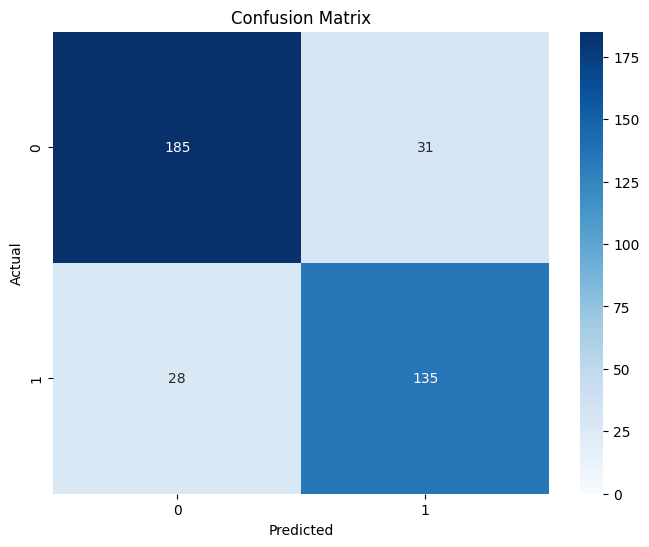

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prediksi
y_pred = knn.predict(X_test)

# Confusion Matrix (Tanpa Normalisasi)
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'], vmin=0, vmax=cm.max())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



**6. Visualisasi Data**

Visualisasi data prediksi

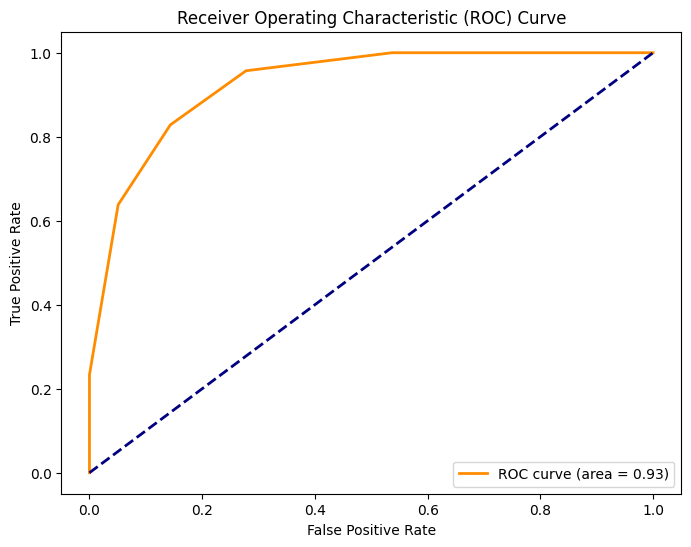

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Assuming 'Tinggi' is the positive class
lb = LabelBinarizer() # Changed to LabelBinarizer for multiclass
y_test_binary = lb.fit_transform(y_test)

# Menghitung Probalitas Prediksi
# Adjust predict_proba for multiclass if necessary
y_score = knn.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class



# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary, y_score) # Calculating fpr, tpr
roc_auc = auc(fpr, tpr)



# Visualize ROC curve for the current class
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve') # Class-specific title
plt.legend(loc='lower right')
plt.show()

**7. Evaluasi Model**

Cetak hasil evaluasi model

In [14]:
# Evaluasi model
y_pred = knn.predict(X_test)

# Confusion matrix dan Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[185  31]
 [ 28 135]]

Classification Report:
               precision    recall  f1-score   support

       TEPAT       0.87      0.86      0.86       216
   TERLAMBAT       0.81      0.83      0.82       163

    accuracy                           0.84       379
   macro avg       0.84      0.84      0.84       379
weighted avg       0.84      0.84      0.84       379

